In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


df = pd.read_csv('~/Downloads/Auto.csv')
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(int)
predictors = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
target = 'mpg'
scaler = StandardScaler()

df[predictors] = scaler.fit_transform(df[predictors])
model = LinearRegression()
model.fit(df[predictors], df[target])
df.to_csv('scaled_auto.csv', index=False)

23.44591836734694
-0.5619499609543879
0.8024761554073603
-0.01504450376949873
-5.7639997133099135
0.23495703662331102
2.771664146525284


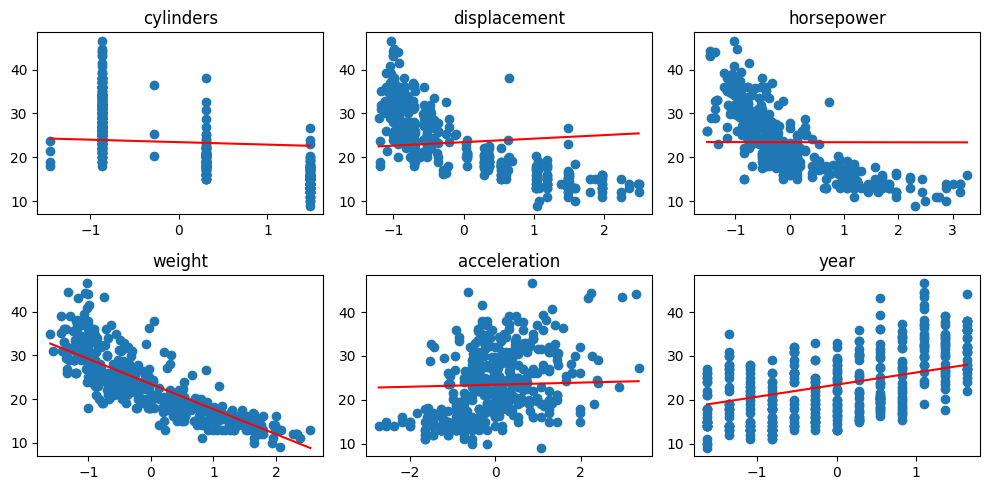

In [6]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(2, 3, figsize=(10, 5))
ax = ax.ravel()
print(model.intercept_)

for i, predictor in enumerate(predictors):
    ax[i].scatter(df[predictor], df[target])
    ax[i].set_title(predictor)
    ax[i].plot(
        [np.amin(df[predictor]), np.amax(df[predictor])],
        [model.intercept_ + np.amin(df[predictor]) * model.coef_[i],
         model.intercept_ + np.amax(df[predictor]) * model.coef_[i]],
        c='red'
    )
    ax[i].set_xlabel('')
    print(model.coef_[i])
plt.tight_layout()
plt.savefig('coefficients.png')
plt.show()

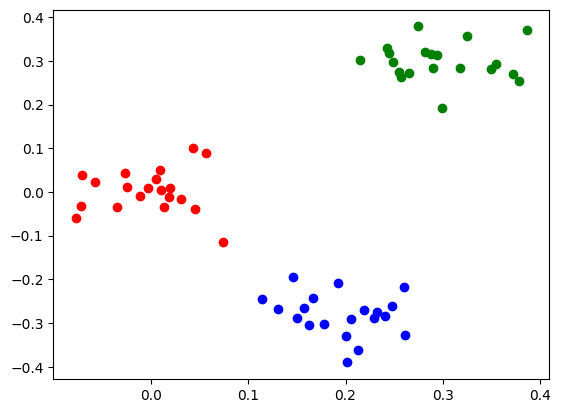

In [7]:
c1 = np.random.normal(0, 0.05, (20, 2))
c2 = np.random.normal(0.3, 0.05, (20, 2))
c3 = np.column_stack([
    np.random.normal(0.2, 0.05, 20),
    np.random.normal(-0.3, 0.05, 20)
])

plt.scatter(c1[:,0], c1[:,1], c='red')
plt.scatter(c2[:,0], c2[:,1], c='green')
plt.scatter(c3[:,0], c3[:,1], c='blue')
plt.show()

x = np.concatenate([c1[:,0], c2[:,0], c3[:,0]])
y = np.concatenate([c1[:,1], c2[:,1], c3[:,1]])
c = np.concatenate([np.zeros(20), np.ones(20), np.ones(20)*2])

cluster_df = pd.DataFrame({'x': x, 'y': y, 'c': c})
cluster_df = df.sample(frac=1.)
cluster_df.head(10)
cluster_df.to_csv('clusterdata.csv', index=False)

In [11]:
from sklearn.decomposition import PCA


model = PCA(n_components=2)
model.fit(df[predictors])
model.components_
transformed = 

array([[ 0.45476297,  0.46885724,  0.46365868,  0.44625213, -0.32464331,
        -0.23205586],
       [ 0.18949971,  0.16303989,  0.01052532,  0.25716695,  0.22125982,
         0.90681107]])